# **Bioinformatics Project - Computational Drug Discovery [Part 2] Exploratory Data Analysis**

Chanin Nantasenamat

[*'Data Professor' YouTube channel*](http://youtube.com/dataprofessor)

In this Jupyter notebook, we will be building a real-life **data science project** that you can include in your **data science portfolio**. Particularly, we will be building a machine learning model using the ChEMBL bioactivity data.

In **Part 2**, we will be performing Descriptor Calculation and Exploratory Data Analysis.

---

## **Install conda and rdkit**

In [ ]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
! conda install -c rdkit rdkit -y
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2022-06-20 20:13:42--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’

Miniconda3-py37_4.8 100%[===================>]  81.12M   171MB/s    in 0.5s    

2022-06-20 20:13:43 (171 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: | / - \ | / - done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1003
    - conda-package-h

## **Load bioactivity data**

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('alk_03_bioactivity_data_curated.csv')
df

FileNotFoundError: ignored

In [ ]:
df_no_smiles = df.drop(columns='canonical_smiles')

In [ ]:
smiles = []

for i in df.canonical_smiles.tolist():
  cpd = str(i).split('.')
  cpd_longest = max(cpd, key = len)
  smiles.append(cpd_longest)

smiles = pd.Series(smiles, name = 'canonical_smiles')

In [ ]:
df_clean_smiles = pd.concat([df_no_smiles,smiles], axis=1)
df_clean_smiles

,molecule_chembl_id,standard_value,class,canonical_smiles
0,CHEMBL199723,400.0,active,CN1CCN(CCc2ccc(NC(=O)c3cc(-c4ccc5c(c4)OCO5)cnc...
1,CHEMBL201277,40000.0,inactive,CN1CCN(Cc2ccc(NC(=O)c3cc(-c4ccc5c(c4)OCO5)cn(C...
2,CHEMBL199298,26800.0,inactive,CN1CCN(Cc2ccc(NC(=O)c3cc(-c4ccc5c(c4)OCO5)cnc3...
3,CHEMBL427188,20300.0,inactive,COc1ncc(-c2ccc3c(c2)OCO3)cc1C(=O)Nc1ccc(CN2CCN...
4,CHEMBL198399,14500.0,inactive,Cc1cc(CN2CCN(C)CC2)ccc1NC(=O)c1cc(-c2ccc3c(c2)...
...,...,...,...,...
1955,CHEMBL4753590,2.8,active,COc1cc(SCc2ccc(CN(C)C)o2)ccc1Nc1ncc(Cl)c(Nc2cc...
1956,CHEMBL4799113,10000.0,inactive,COCC/C(=N\S(=O)(=O)Cc1ccc(Cl)cc1)Nc1ccc(Oc2ccn...
1957,CHEMBL4088216,1000.0,active,CN1C(=O)[C@@H](N2CCc3cn(Cc4ccccc4)nc3C2=O)COc2...
1958,CHEMBL4549667,1000.0,active,CN1C(=O)[C@@H](N2CCc3c(nn(Cc4ccccc4)c3Br)C2=O)...


## **Calculate Lipinski descriptors**
Christopher Lipinski, a scientist at Pfizer, came up with a set of rule-of-thumb for evaluating the **druglikeness** of compounds. Such druglikeness is based on the Absorption, Distribution, Metabolism and Excretion (ADME) that is also known as the pharmacokinetic profile. Lipinski analyzed all orally active FDA-approved drugs in the formulation of what is to be known as the **Rule-of-Five** or **Lipinski's Rule**.

The Lipinski's Rule stated the following:
* Molecular weight < 500 Dalton
* Octanol-water partition coefficient (LogP) < 5
* Hydrogen bond donors < 5
* Hydrogen bond acceptors < 10 

### **Import libraries**

In [ ]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

### **Calculate descriptors**

In [ ]:
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation

def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) 
        moldata.append(mol)
       
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
       
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors

In [ ]:
df_lipinski = lipinski(df_clean_smiles.canonical_smiles)
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,460.534,3.22510,2.0,7.0
1,460.534,2.78070,1.0,7.0
2,464.953,4.13040,1.0,6.0
3,460.534,3.48560,1.0,7.0
4,460.534,3.49102,2.0,7.0
...,...,...,...,...
1955,589.143,5.94420,3.0,10.0
1956,701.217,6.30620,1.0,9.0
1957,402.454,2.35370,0.0,5.0
1958,481.350,3.11620,0.0,5.0


### **Combine DataFrames**

Let's take a look at the 2 DataFrames that will be combined.

In [ ]:
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,460.534,3.22510,2.0,7.0
1,460.534,2.78070,1.0,7.0
2,464.953,4.13040,1.0,6.0
3,460.534,3.48560,1.0,7.0
4,460.534,3.49102,2.0,7.0
...,...,...,...,...
1955,589.143,5.94420,3.0,10.0
1956,701.217,6.30620,1.0,9.0
1957,402.454,2.35370,0.0,5.0
1958,481.350,3.11620,0.0,5.0


In [ ]:
df

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL199723,CN1CCN(CCc2ccc(NC(=O)c3cc(-c4ccc5c(c4)OCO5)cnc...,400.0,active
1,CHEMBL201277,CN1CCN(Cc2ccc(NC(=O)c3cc(-c4ccc5c(c4)OCO5)cn(C...,40000.0,inactive
2,CHEMBL199298,CN1CCN(Cc2ccc(NC(=O)c3cc(-c4ccc5c(c4)OCO5)cnc3...,26800.0,inactive
3,CHEMBL427188,COc1ncc(-c2ccc3c(c2)OCO3)cc1C(=O)Nc1ccc(CN2CCN...,20300.0,inactive
4,CHEMBL198399,Cc1cc(CN2CCN(C)CC2)ccc1NC(=O)c1cc(-c2ccc3c(c2)...,14500.0,inactive
...,...,...,...,...
1955,CHEMBL4753590,COc1cc(SCc2ccc(CN(C)C)o2)ccc1Nc1ncc(Cl)c(Nc2cc...,2.8,active
1956,CHEMBL4799113,COCC/C(=N\S(=O)(=O)Cc1ccc(Cl)cc1)Nc1ccc(Oc2ccn...,10000.0,inactive
1957,CHEMBL4088216,CN1C(=O)[C@@H](N2CCc3cn(Cc4ccccc4)nc3C2=O)COc2...,1000.0,active
1958,CHEMBL4549667,CN1C(=O)[C@@H](N2CCc3c(nn(Cc4ccccc4)c3Br)C2=O)...,1000.0,active


Now, let's combine the 2 DataFrame

In [ ]:
df_combined = pd.concat([df,df_lipinski], axis=1)

In [ ]:
df_combined

,molecule_chembl_id,canonical_smiles,standard_value,class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL199723,CN1CCN(CCc2ccc(NC(=O)c3cc(-c4ccc5c(c4)OCO5)cnc...,400.0,active,460.534,3.22510,2.0,7.0
1,CHEMBL201277,CN1CCN(Cc2ccc(NC(=O)c3cc(-c4ccc5c(c4)OCO5)cn(C...,40000.0,inactive,460.534,2.78070,1.0,7.0
2,CHEMBL199298,CN1CCN(Cc2ccc(NC(=O)c3cc(-c4ccc5c(c4)OCO5)cnc3...,26800.0,inactive,464.953,4.13040,1.0,6.0
3,CHEMBL427188,COc1ncc(-c2ccc3c(c2)OCO3)cc1C(=O)Nc1ccc(CN2CCN...,20300.0,inactive,460.534,3.48560,1.0,7.0
4,CHEMBL198399,Cc1cc(CN2CCN(C)CC2)ccc1NC(=O)c1cc(-c2ccc3c(c2)...,14500.0,inactive,460.534,3.49102,2.0,7.0
...,...,...,...,...,...,...,...,...
1955,CHEMBL4753590,COc1cc(SCc2ccc(CN(C)C)o2)ccc1Nc1ncc(Cl)c(Nc2cc...,2.8,active,589.143,5.94420,3.0,10.0
1956,CHEMBL4799113,COCC/C(=N\S(=O)(=O)Cc1ccc(Cl)cc1)Nc1ccc(Oc2ccn...,10000.0,inactive,701.217,6.30620,1.0,9.0
1957,CHEMBL4088216,CN1C(=O)[C@@H](N2CCc3cn(Cc4ccccc4)nc3C2=O)COc2...,1000.0,active,402.454,2.35370,0.0,5.0
1958,CHEMBL4549667,CN1C(=O)[C@@H](N2CCc3c(nn(Cc4ccccc4)c3Br)C2=O)...,1000.0,active,481.350,3.11620,0.0,5.0


### **Convert IC50 to pIC50**
To allow **IC50** data to be more uniformly distributed, we will convert **IC50** to the negative logarithmic scale which is essentially **-log10(IC50)**.

This custom function pIC50() will accept a DataFrame as input and will:
* Take the IC50 values from the ``standard_value`` column and converts it from nM to M by multiplying the value by 10$^{-9}$
* Take the molar value and apply -log10
* Delete the ``standard_value`` column and create a new ``pIC50`` column

In [ ]:
# https://github.com/chaninlab/estrogen-receptor-alpha-qsar/blob/master/02_ER_alpha_RO5.ipynb

import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', 1)
        
    return x

Point to note: Values greater than 100,000,000 will be fixed at 100,000,000 otherwise the negative logarithmic value will become negative.

In [ ]:
df_combined.standard_value.describe()

count       1960.000000
mean        4660.926645
std        40187.351534
min            0.110000
25%            6.375000
50%           48.650000
75%         1000.000000
max      1000000.000000
Name: standard_value, dtype: float64

In [ ]:
-np.log10( (10**-9)* 100000000 )

1.0

In [ ]:
-np.log10( (10**-9)* 10000000000 )

-1.0

In [ ]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', 1)
        
    return x

We will first apply the norm_value() function so that the values in the standard_value column is normalized.

In [ ]:
df_norm = norm_value(df_combined)
df_norm

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  # Remove the CWD from sys.path while we load stuff.


,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL199723,CN1CCN(CCc2ccc(NC(=O)c3cc(-c4ccc5c(c4)OCO5)cnc...,active,460.534,3.22510,2.0,7.0,400.0
1,CHEMBL201277,CN1CCN(Cc2ccc(NC(=O)c3cc(-c4ccc5c(c4)OCO5)cn(C...,inactive,460.534,2.78070,1.0,7.0,40000.0
2,CHEMBL199298,CN1CCN(Cc2ccc(NC(=O)c3cc(-c4ccc5c(c4)OCO5)cnc3...,inactive,464.953,4.13040,1.0,6.0,26800.0
3,CHEMBL427188,COc1ncc(-c2ccc3c(c2)OCO3)cc1C(=O)Nc1ccc(CN2CCN...,inactive,460.534,3.48560,1.0,7.0,20300.0
4,CHEMBL198399,Cc1cc(CN2CCN(C)CC2)ccc1NC(=O)c1cc(-c2ccc3c(c2)...,inactive,460.534,3.49102,2.0,7.0,14500.0
...,...,...,...,...,...,...,...,...
1955,CHEMBL4753590,COc1cc(SCc2ccc(CN(C)C)o2)ccc1Nc1ncc(Cl)c(Nc2cc...,active,589.143,5.94420,3.0,10.0,2.8
1956,CHEMBL4799113,COCC/C(=N\S(=O)(=O)Cc1ccc(Cl)cc1)Nc1ccc(Oc2ccn...,inactive,701.217,6.30620,1.0,9.0,10000.0
1957,CHEMBL4088216,CN1C(=O)[C@@H](N2CCc3cn(Cc4ccccc4)nc3C2=O)COc2...,active,402.454,2.35370,0.0,5.0,1000.0
1958,CHEMBL4549667,CN1C(=O)[C@@H](N2CCc3c(nn(Cc4ccccc4)c3Br)C2=O)...,active,481.350,3.11620,0.0,5.0,1000.0


In [ ]:
df_norm.standard_value_norm.describe()

count       1960.000000
mean        4660.926645
std        40187.351534
min            0.110000
25%            6.375000
50%           48.650000
75%         1000.000000
max      1000000.000000
Name: standard_value_norm, dtype: float64

In [ ]:
df_final = pIC50(df_norm)
df_final

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  del sys.path[0]


,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL199723,CN1CCN(CCc2ccc(NC(=O)c3cc(-c4ccc5c(c4)OCO5)cnc...,active,460.534,3.22510,2.0,7.0,6.397940
1,CHEMBL201277,CN1CCN(Cc2ccc(NC(=O)c3cc(-c4ccc5c(c4)OCO5)cn(C...,inactive,460.534,2.78070,1.0,7.0,4.397940
2,CHEMBL199298,CN1CCN(Cc2ccc(NC(=O)c3cc(-c4ccc5c(c4)OCO5)cnc3...,inactive,464.953,4.13040,1.0,6.0,4.571865
3,CHEMBL427188,COc1ncc(-c2ccc3c(c2)OCO3)cc1C(=O)Nc1ccc(CN2CCN...,inactive,460.534,3.48560,1.0,7.0,4.692504
4,CHEMBL198399,Cc1cc(CN2CCN(C)CC2)ccc1NC(=O)c1cc(-c2ccc3c(c2)...,inactive,460.534,3.49102,2.0,7.0,4.838632
...,...,...,...,...,...,...,...,...
1955,CHEMBL4753590,COc1cc(SCc2ccc(CN(C)C)o2)ccc1Nc1ncc(Cl)c(Nc2cc...,active,589.143,5.94420,3.0,10.0,8.552842
1956,CHEMBL4799113,COCC/C(=N\S(=O)(=O)Cc1ccc(Cl)cc1)Nc1ccc(Oc2ccn...,inactive,701.217,6.30620,1.0,9.0,5.000000
1957,CHEMBL4088216,CN1C(=O)[C@@H](N2CCc3cn(Cc4ccccc4)nc3C2=O)COc2...,active,402.454,2.35370,0.0,5.0,6.000000
1958,CHEMBL4549667,CN1C(=O)[C@@H](N2CCc3c(nn(Cc4ccccc4)c3Br)C2=O)...,active,481.350,3.11620,0.0,5.0,6.000000


In [ ]:
df_final.pIC50.describe()

count    1960.000000
mean        7.072271
std         1.390499
min         3.000000
25%         6.000000
50%         7.312928
75%         8.195530
max         9.958607
Name: pIC50, dtype: float64

Let's write this to CSV file.

In [ ]:
df_final.to_csv('alk_04_bioactivity_data_3class_pIC50.csv')

### **Removing the 'intermediate' bioactivity class**
Here, we will be removing the ``intermediate`` class from our data set.

In [ ]:
df_2class = df_final[df_final['class'] != 'intermediate']
df_2class

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL199723,CN1CCN(CCc2ccc(NC(=O)c3cc(-c4ccc5c(c4)OCO5)cnc...,active,460.534,3.22510,2.0,7.0,6.397940
1,CHEMBL201277,CN1CCN(Cc2ccc(NC(=O)c3cc(-c4ccc5c(c4)OCO5)cn(C...,inactive,460.534,2.78070,1.0,7.0,4.397940
2,CHEMBL199298,CN1CCN(Cc2ccc(NC(=O)c3cc(-c4ccc5c(c4)OCO5)cnc3...,inactive,464.953,4.13040,1.0,6.0,4.571865
3,CHEMBL427188,COc1ncc(-c2ccc3c(c2)OCO3)cc1C(=O)Nc1ccc(CN2CCN...,inactive,460.534,3.48560,1.0,7.0,4.692504
4,CHEMBL198399,Cc1cc(CN2CCN(C)CC2)ccc1NC(=O)c1cc(-c2ccc3c(c2)...,inactive,460.534,3.49102,2.0,7.0,4.838632
...,...,...,...,...,...,...,...,...
1955,CHEMBL4753590,COc1cc(SCc2ccc(CN(C)C)o2)ccc1Nc1ncc(Cl)c(Nc2cc...,active,589.143,5.94420,3.0,10.0,8.552842
1956,CHEMBL4799113,COCC/C(=N\S(=O)(=O)Cc1ccc(Cl)cc1)Nc1ccc(Oc2ccn...,inactive,701.217,6.30620,1.0,9.0,5.000000
1957,CHEMBL4088216,CN1C(=O)[C@@H](N2CCc3cn(Cc4ccccc4)nc3C2=O)COc2...,active,402.454,2.35370,0.0,5.0,6.000000
1958,CHEMBL4549667,CN1C(=O)[C@@H](N2CCc3c(nn(Cc4ccccc4)c3Br)C2=O)...,active,481.350,3.11620,0.0,5.0,6.000000


Let's write this to CSV file.

In [ ]:
df_2class.to_csv('alk_05_bioactivity_data_2class_pIC50.csv')

---

## **Exploratory Data Analysis (Chemical Space Analysis) via Lipinski descriptors**

### **Import library**

In [ ]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

### **Frequency plot of the 2 bioactivity classes**

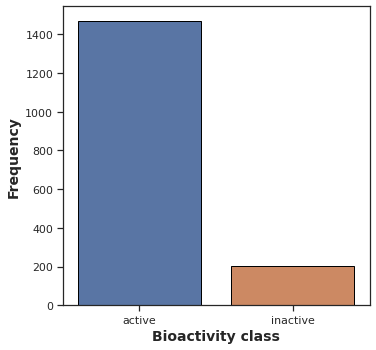

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='class', data=df_2class, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

### **Scatter plot of MW versus LogP**

It can be seen that the 2 bioactivity classes are spanning similar chemical spaces as evident by the scatter plot of MW vs LogP.

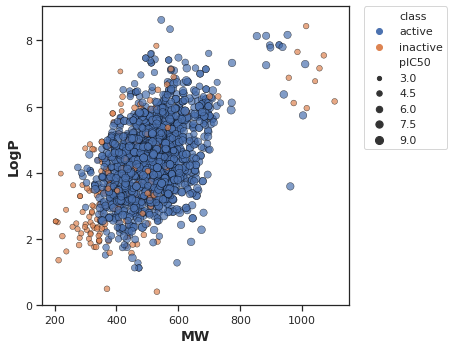

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

### **Box plots**

#### **pIC50 value**

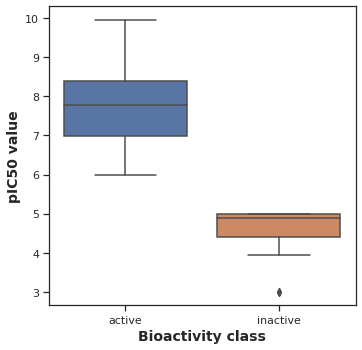

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'pIC50', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [ ]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'class']
  df = df_2class[selection]
  active = df[df['class'] == 'active']
  active = active[descriptor]

  selection = [descriptor, 'class']
  df = df_2class[selection]
  inactive = df[df['class'] == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'
  
  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [ ]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,0.0,1.208320e-117,0.05,Different distribution (reject H0)


#### **MW**

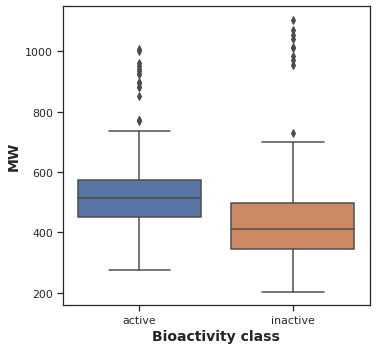

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'MW', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

In [ ]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,72613.5,5.275212e-32,0.05,Different distribution (reject H0)


#### **LogP**

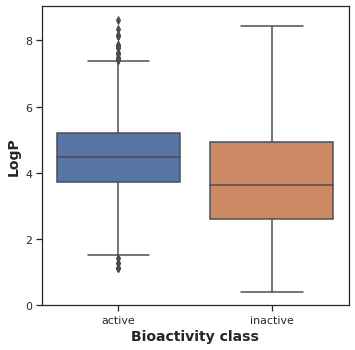

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'LogP', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [ ]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,107222.0,1.261050e-10,0.05,Different distribution (reject H0)


#### **NumHDonors**

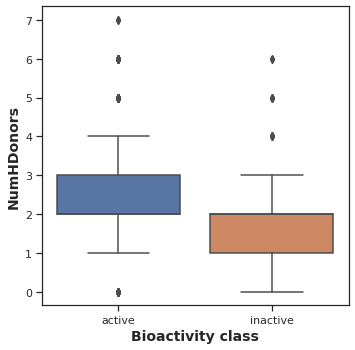

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHDonors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [ ]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,109435.0,2.551402e-10,0.05,Different distribution (reject H0)


#### **NumHAcceptors**

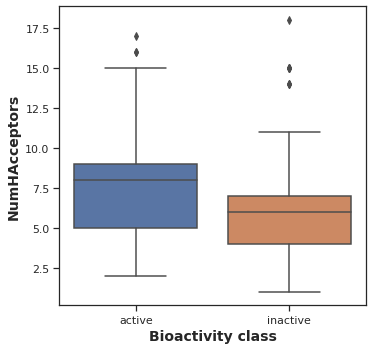

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHAcceptors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

In [ ]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,100223.5,3.843496e-14,0.05,Different distribution (reject H0)


#### **Interpretation of Statistical Results**

##### **Box Plots**

###### **pIC50 values**

Taking a look at pIC50 values, the **actives** and **inactives** displayed ***statistically significant difference***, which is to be expected since threshold values (``IC50 < 1,000 nM = Actives while IC50 > 10,000 nM = Inactives``, corresponding to ``pIC50 > 6 = Actives and pIC50 < 5 = Inactives``) were used to define actives and inactives.

###### **Lipinski's descriptors**

All of the 4 Lipinski's descriptors exhibited ***statistically significant difference*** between the **actives** and **inactives**.

## **Zip files**

In [ ]:
! zip -r results.zip . -i *.csv *.pdf

  adding: alk_04_bioactivity_data_3class_pIC50.csv (deflated 78%)
  adding: alk_05_bioactivity_data_2class_pIC50.csv (deflated 78%)
  adding: plot_NumHDonors.pdf (deflated 38%)
  adding: plot_ic50.pdf (deflated 36%)
  adding: mannwhitneyu_LogP.csv (deflated 10%)
  adding: mannwhitneyu_NumHAcceptors.csv (deflated 11%)
  adding: plot_LogP.pdf (deflated 37%)
  adding: plot_NumHAcceptors.pdf (deflated 39%)
  adding: plot_MW_vs_LogP.pdf (deflated 3%)
  adding: mannwhitneyu_pIC50.csv (deflated 10%)
  adding: plot_bioactivity_class.pdf (deflated 38%)
  adding: mannwhitneyu_NumHDonors.csv (deflated 10%)
  adding: alk_03_bioactivity_data_curated.csv (deflated 84%)
  adding: mannwhitneyu_MW.csv (deflated 7%)
  adding: plot_MW.pdf (deflated 39%)
